In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("alexa_reviews.csv")

In [3]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [4]:
df.shape

(3150, 2)

In [5]:
positive_feedback = ' '.join(df[df["feedback"]==1]["verified_reviews"])
negative_feedback = ' '.join(df[df["feedback"]==0]["verified_reviews"])

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [7]:
wc.generate(positive_feedback)

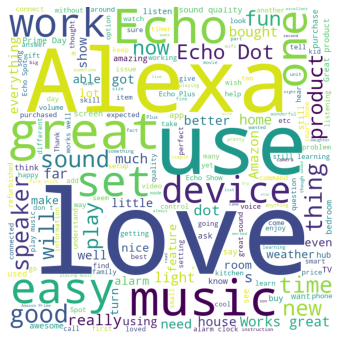

In [8]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [9]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [10]:
wc.generate(negative_feedback)

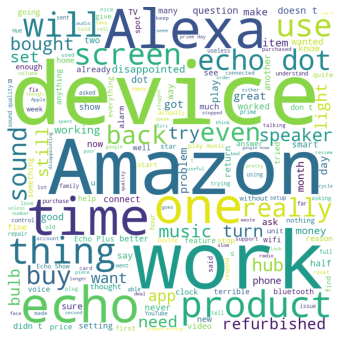

In [11]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [12]:
# feature and target
X = df["verified_reviews"]
y = df["feedback"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [16]:
model1 = DecisionTreeClassifier()
model1.fit(X_train_cv, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = model1.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51        73
           1       0.96      0.96      0.96       872

    accuracy                           0.92       945
   macro avg       0.74      0.73      0.73       945
weighted avg       0.92      0.92      0.92       945



In [18]:
# tfidf
tf = TfidfVectorizer(stop_words="english")
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [19]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_tf, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model2.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46        73
           1       0.95      0.97      0.96       872

    accuracy                           0.92       945
   macro avg       0.73      0.70      0.71       945
weighted avg       0.92      0.92      0.92       945

